<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

# Unknown three body decay <a name="c"></a>

**The following analysis aims to find the decay process. We will know which are the final state particles and we want to search the decay.**

In this tutorial we will start from pions and kaons as final state particles, and we aim to find the combination for which the invariant mass distribution looks like a gaussian centered at the value corresponding to the mass of the decaying particle.

The pion, $\pi$, is composed of a $u$ quark and an $\bar{d}$ antiquark and the kaon is composed of a $u$ quark and an $\bar{s}$ antiquark (as we've seen in the Introduction to Particle Physics notebook). In this notebook we want to reconstruct the trajectories of our final state particles, our pions and kaons, in order to find the mass of the decaying meson.

We will be dealing with a three-body decay, the total electric charge must be conserved! 

We've learned in the previous notebook about 4-vectors and we know how to manipulate them. You will see now why was so important to learn about 4-vectors and what we can do with them in real life! We will look at the $D^+$ decay to three pions but firstly, we need to think about how we talk about decays in particle physcis.

**Contents:**
- [Decays](#1.)
- [The invariant mass calculation](#2.)
- [Cuts](#3.)
- [Find the $D^+$ meson!](#4.)

---

## Decays <a name="1."></a>

Let's start with understanding the idea of a decay process!

We want to find the decaying mesons, but they don't live long enough to actually see with the detector itself. Instead, we have to **reconstruct** them from their decay products. We don't particularly mind where the the decaying mesons themselves come from. All you need to know here is that each time the LHC smashes two protons together, they produce lots and lots of particles.



In this process, our decaying meson emerges from the collision aftermath in the LHC (we don't care how) can decay directly to three pions. The decay happens at the vertex below, where the two black arrows meet. Here our final state particles labeled as $h$ can be either pions or kaons, and $X$ is our decaying particle to be identified.

<figure>
    <center> <img src="images/3body-decay.png" alt="TEST" style="width:40%" />
   <figcaption>Image 1: The $D^+$ decay directly from the proton-proton collision. </figcaption> </center>
</figure>

The LHCb detector can measure the momentum and energy of muons coming out of decays, and you can access that information quite simply. It also measures the charge and flavour of each lepton (whether its a muon/antimuon).

We mentioned earlier that each smash makes lots of particles. That's true - in fact, it makes so many that we can't actually store all the records of what happened, even on some of the biggest data storage facilities in the world. 



Next we have to open the data that we want to analyze. As described earlier, the data is stored in a *.root file. We can use a python library called uproot to access the data. Below is an example of how to open a *.root file using uproot

In [36]:
## data file
import uproot
f = uproot.open("../LHCb_data/3Body/Unknown3body.root")

We can inspect the contents of a file by using the method keys()

In [37]:
f.keys()

['DecayTree;1']

We see that we have an object called 'DecayTree'. We can obtain information about the object in the file and its type by using the method classnames()

In [38]:
f.classnames()

{'DecayTree;1': 'TTree'}

We see that the object called DecayTree is a TTree type. A TTree is simply columns of data stored in the .root format. Each column of data can represent a different physical quantity of a particle. For instance, its charge, energy, momentum etc.

Now we know what data the file contains, in future we can quickly access that data. We want to access the mini data. This can be done by executing the command below


In [39]:
events = uproot.open("../LHCb_data/3Body/Unknown3body.root:DecayTree")

Let's look at contents of the TTree. Essentially all the columns in the TTree called DecayTree

In [40]:
events.keys()

['p3_PX',
 'p3_PY',
 'p3_PZ',
 'p2_PX',
 'p2_PY',
 'p2_PZ',
 'p1_PX',
 'p1_PY',
 'p1_PZ']

We can use the .arrays method to access events with just the columns we specify.

In [41]:
sel_events = events.arrays(["p1_PX","p1_PY","p1_PZ","p2_PX","p2_PY","p2_PZ","p3_PX","p3_PY","p3_PZ"])

We want to run over all the data and reconstruct the $D^+$ meson mass. To do this we will access events using the arrays method again. Let's look at doing this.

First we define a histogram. To do this we can import the python hist library. Once we have done that we can define a histogram. Its name is hist and the x axis is named $m(\pi^-\pi^+\pi^+)$ (MeV). The three initial arguments indicate that this histogram contains 100 bins which fill the gap from 0,150000.


In [42]:
import hist
from hist import Hist

hist_mass = Hist(hist.axis.Regular(100,0,150000, label = "$m(\pi^-\pi^+\pi^+)$ (GeV)"))

It is now time to fill our above defined histogram with the masses. To do that, we need to reconstruct our $D^+$ meson invariant mass. 


[Return to contents](#c)

---

## The invariant mass calculation <a name="2."></a>

One very important quantity we need to define is the invariant mass! It is defined as an invariant quantity which is the same for all observers in all reference frames (that's why we call it *invariant*). To calculate it we use the energy, *E*, and momentum, *p*, both measured in the detector. To derive a proper expression for the invariat mass we ask that in the process both energy and momentum are conserved! 

* Energy conservation

$ E = E_{h1} + E_{h2} + E_{h3} $

* Momentum conservation

$ \vec{p} = \vec{p}_{h1} + \vec{p}_{h2} + \vec{p}_{h3} $

From special relativity we've learned the relation between mass, energy and momentum to be:

$ (pc)^2 + (mc^2)^2 = E^2 $

$ E^2 = p^2 + m^2$

Rearranging it to $m$:

$ m^2 = E^2 - p2 = (E_{h1} + E_{h2} + E_{h3})^2 - || p_{h1} + p_{h2} + p_{h3} ||$

$ m^2 = (E_{h1}+ E_{h2} + E_{h3})^2 - (\vec{p}_{h1} + \vec{p}_{h2} + \vec{p}_{h3})\cdot (\vec{p}_{h1} + \vec{p}_{h2} + \vec{p}_{h3})$

Since the dot product of two orthogonal vectors is zero, we can write more explicitly

$ m^2 = (E_{h1} + E_{h2} + E_{h3})^2 - (p_{h1_x} + p_{h2_x} + p_{h3_x} )^2 - (p_{h1_y} + p_{h2_y} + p_{h3_y})^2 - (p_{h1_z} + p_{h2_z} + p_{h3_z})^2$

<div class="alert alert-info"> Our goal is to calculte the invariant mass of the three chosen particles and we save it to a histogram.</div> 

## Extracting momentum components and calculating the energy distributions


In [43]:
# Extracting the momentum components and energy of the first muon
p1x = events["p1_PX"].array(library="np")
p1y = events["p1_PY"].array(library="np")
p1z = events["p1_PZ"].array(library="np")

Let's visualise one of these momentum components, for instance let's check the x-component of the one of our final particles! To do that we first define a histogram, and we fill it with the values we extracted in `p1x`.

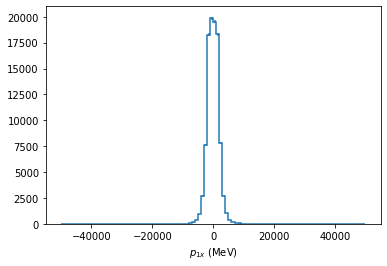

In [44]:
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np

# Defining histogram
hist_p1x = Hist(hist.axis.Regular(100,-50e3,50e3, label = "$p_{1x}$ (MeV)"))

# Fiblling histogram with values of p1x
hist_p1x.fill(p1x)

# Plotting the histogram
hist_p1x.plot()
plt.show()

Great! Momentum is a **vector** quantity, it has x,y and z components. Now let's try to calculate the magnitude of the momentum, $p^{2} = p_{x}^{2} + p_{y}^{2} + p_{z}^{2}$, of the first kaon candidate and plot it into a histogram: 

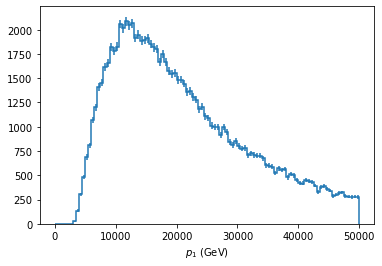

In [45]:
# Calulating the magnitude of the momentum:
p1 = np.sqrt( p1x**2 + p1y**2 + p1z**2)

# Defining histogram
hist_p1 = Hist(hist.axis.Regular(100,0e3,50e3, label = "$p_{1}$ (GeV)")) # *** axis label: meson not muon

# Fiblling histogram with values of p1
hist_p1.fill(p1)

# Plotting the histogram
hist_p1.plot()
plt.show()

### Your turn!

We've calculated the magnitude of the momentum for the first final state particle. Repeat that now for the other two!

The first step is to extract the momentum components. Then plot one of the components as an example, for instace the x-component. Finally, calculate and plot the magnitude of the momentum for the second muon.

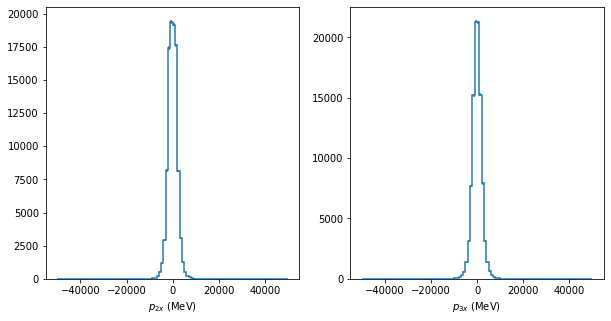

In [46]:
# Extracting the momentum components and energy of the second muon
p2x = events["p2_PX"].array(library="np")
p2y = events["p2_PY"].array(library="np")
p2z = events["p2_PZ"].array(library="np")

p3x = events["p3_PX"].array(library="np")
p3y = events["p3_PY"].array(library="np")
p3z = events["p3_PZ"].array(library="np")

# Defining histogram
hist_p2x = Hist(hist.axis.Regular(100,-50e3,50e3, label = "$p_{2x}$ (MeV)"))
hist_p3x = Hist(hist.axis.Regular(100,-50e3,50e3, label = "$p_{3x}$ (MeV)"))

# Filling histogram with values of p1x
hist_p2x.fill(p2x)
hist_p3x.fill(p3x)

# Plotting the histograms
fig, axes = plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
hist_p2x.plot()
plt.subplot(1,2,2)
hist_p3x.plot()
plt.show()

plt.show()

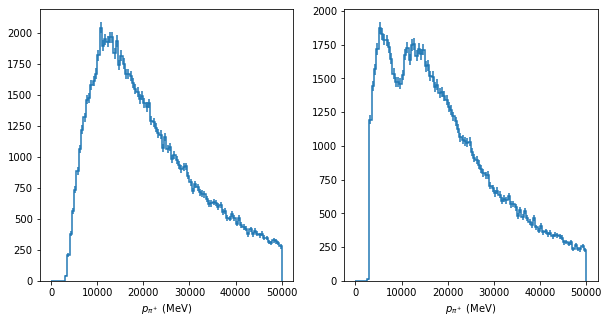

In [47]:
# Calulating the magnitude of the momentum:
p2 = np.sqrt( p2x**2 + p2y**2 + p2z**2)
p3 = np.sqrt( p3x**2 + p3y**2 + p3z**2)

# Defining histogram
hist_p2 = Hist(hist.axis.Regular(100,0e3,50e3, label = "$p_{\pi^+}$ (MeV)"))
hist_p3 = Hist(hist.axis.Regular(100,0e3,50e3, label = "$p_{\pi^+}$ (MeV)"))


# Fiblling histogram with values of p1x
hist_p2.fill(p2)
hist_p3.fill(p3)

# Plotting the histograms
fig, axes = plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
hist_p2.plot()
plt.subplot(1,2,2)
hist_p3.plot()
plt.show()


## Find the decaying meson! <a name="4."></a>

So far we've learned how to obtain the momentum magnitude but to calculate the energy, we need to know what particles are present in our final state. To find out the exact decays are looking at, we will need to go thought all the possible combinations for a three-body decay involving only pions and kaons, calculate the energy and then we will be ready to reconstruct the invariant mass! 

Since we have only kaons and pions in our three body decay, the possible combinations in the final state we have are:

* $KKK$
* $\pi\pi\pi$
* $\pi KK$
* $\pi K\pi$
* $K\pi\pi$
* $K \pi K$
* $\pi \pi K$
* $KK\pi$

From the PDG, we know that the mass of the kaon and the pion are:

* $m_{\pi} = 139.57$ MeV/c$^2$
* $m_{K} = 493.667$ MeV/c$^2$

To identify our decay, we want to reconstruct the invariant mass distribution and we expect that this distribution to look like a gaussian function. If we place the wrong final state particle in a given position, for instance, if we say particle 1 is a pion and it was actually supposed to be a kaon, we will see deviations form our ideal gaussian shape. So this will tell us if the combination we are proposing is right or not.

First step is to define the histograms:

In [48]:
# Declaring the histograms for each possible combination
h_pipipi = Hist(hist.axis.Regular(140,1500,2200, label = "$m(\pi^- \pi^+ \pi^+)$ (GeV)"))
h_pikk = Hist(hist.axis.Regular(140,1500,2200, label = "$m(\pi^- K^+ K^+)$ (GeV)"))
h_pikpi = Hist(hist.axis.Regular(140,1500,2200, label = "$m(\pi^- K+ \pi^+)$ (GeV)"))
h_kkk = Hist(hist.axis.Regular(140,1500,2200, label = "$m(K- K+ K^+)$ (GeV)"))
h_kpipi = Hist(hist.axis.Regular(140,1500,2200, label = "$m(K^- \pi^+ \pi^+)$ (GeV)"))
h_kpik = Hist(hist.axis.Regular(140,1500,2200, label = "$m(K^- \pi^+ K^+)$ (GeV)"))
h_pipik = Hist(hist.axis.Regular(140,1500,2200, label = "$m(\pi^- \pi^+ K^+)$ (GeV)"))
h_kkpi = Hist(hist.axis.Regular(140,1500,2200, label = "$m(K^- K^+ \pi^+)$ (GeV)"))

Then let's define the mass of the pion and kaon:

In [49]:
# Declaring kaon and pion mass in MeV
mk = 493.667
mpi = 139.57

## Calculating the invariant mass distributions

To test all of our 8 combinations, we will loop through all the events we have in our file and calculate all the eight hypothesis. We will evaluate the energy of the three final state particles, reconstruct the invariant mass and save it into our histogram so we can plot everything together at the end.

In [50]:
sel_events = events.arrays(["p1_PX","p1_PY","p1_PZ","p2_PX","p2_PY","p2_PZ","p3_PX","p3_PY","p3_PZ"])

for event in sel_events:

    # KKpi hypothesis
    e1 = np.sqrt(mk**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mk**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mpi**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mkkpi = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_kkpi.fill(mkkpi)
  

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7faf60ae5790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

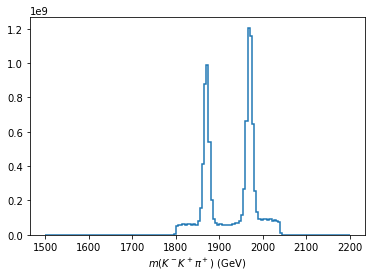

In [51]:
h_kkpi.plot()

In [35]:
sel_events = events.arrays(["p1_PX","p1_PY","p1_PZ","p2_PX","p2_PY","p2_PZ","p3_PX","p3_PY","p3_PZ"])

for event in sel_events:

    # KKpi hypothesis
    e1 = np.sqrt(mk**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mk**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mpi**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mkkpi = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_kkpi.fill(mkkpi)


    # pipipi hypothesis
    e1 = np.sqrt(mpi**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mpi**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mpi**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mpipipi = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_pipipi.fill(mpipipi)

    # piKK hypothesis
    e1 = np.sqrt(mpi**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mk**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mk**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mpikk = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_pikk.fill(mpikk)

    # piKpi hypothesis
    e1 = np.sqrt(mpi**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mk**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mpi**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mpikpi = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_pikpi.fill(mpikpi)


    # KKK hypothesis
    e1 = np.sqrt(mk**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mk**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mk**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mkkk = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_kkk.fill(mkkk)

    # Kpipi hypothesis
    e1 = np.sqrt(mk**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mpi**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mpi**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mkpipi = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_kpipi.fill(mkpipi)

    # KpiK hypothesis
    e1 = np.sqrt(mk**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mpi**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mk**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mkpik = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_kpik.fill(mkpik)

    # pipik hypothesis
    e1 = np.sqrt(mpi**2 + p1x**2 + p1y**2 + p1z**2)
    e2 = np.sqrt(mpi**2 + p2x**2 + p2y**2 + p2z**2)
    e3 = np.sqrt(mk**2 + p3x**2 + p3y**2 + p3z**2)
    e_tot = e1 + e2 + e3
    px_tot = p1x + p2x + p3x
    py_tot = p1y + p2y + p3y
    pz_tot = p1z + p2z + p3z

    mpipik = np.sqrt(e_tot**2 - px_tot**2 - py_tot**2 - pz_tot**2)
    h_pipik.fill(mpipik)   

KeyboardInterrupt: 

Let's now plot all of our histograms!

In [ ]:
# Declaring the histograms for each possible combination
h_pipipi.plot()
h_pikk.plot()
h_pikpi.plot()
h_kkk.plot()
h_kpipi.plot()
h_kpik.plot()
h_pipik.plot()
h_kkpi.plot()

<div class="alert alert-success">
Great Job! By now you might have all eight invariant mass plots and our final job is to identify our decay!
</div>

Can you find any of our combinations for which the invariant mass distribution looks like a gaussian function? If yes, which one is that?


<details>
    <summary>Answer: </summary>
        $KK\pi$ is our decay!
</details>


## Extra: Fitting our mass distribution

Now, our last step is to fit this distribution

In [ ]:
# 1.) Necessary imports.    
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2.) Define fit function: Gaussian + exponential
def fit_function(x, A, B, C, mu, sigma):
    return (A*np.exp(B*x) + C * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

# 3.) Define bins and bin centers
bins = np.linspace(1810, 1910, 100)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# 4.) Save the number of events per bin, and the bin values to arrays:
y = hist_mD0.counts()
x = hist_mD0.values()

# 5.) Fit the function to the histogram data.

# To perform a fit we first need to set initial values for the parameters in our function, usually we guess 
# the initial values for our parameters and we let the fit find the optimal values for each one
INITIAL_GUESS = [450,0,3000,1870,10]

popt, pcov = curve_fit(fit_function, xdata=x, ydata=y, p0=INITIAL_GUESS)
print(popt)
error = np.sqrt(np.diag(pcov))

# 6.) Generate enough x values to make the curves look smooth.
xspace = np.linspace(1810, 1910, 100000)

# 7.) Plot the histogram and the fitted function.
hist_mD0.plot(histtype = "fill",label=r'Data')
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

plt.xlim(1810,1920)
plt.xlabel(r'$mass$')
plt.ylabel(r'Number of entries')
plt.title(r'Invariant mass fit')
plt.legend(loc='best')
plt.show()
plt.clf()

In [19]:
# Declaring kaon and pion mass
# ***mk = 0.493667***
# ***mpi = 0.13957***
mk = 493.667
mpi = 139.57

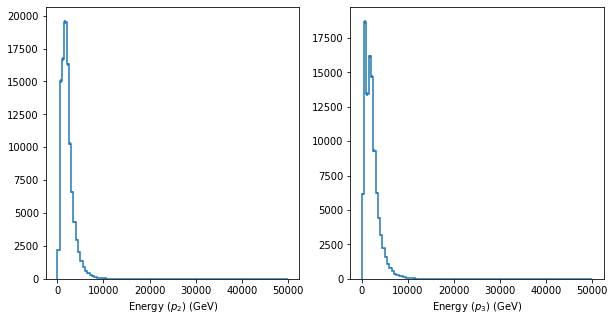

In [20]:
# Creating histograms for e2 and e3 (energy of the second and third particles)
hist_e1 = Hist(hist.axis.Regular(100,0,50e3, label = "Energy ($p_1$) (GeV)"))
hist_e2 = Hist(hist.axis.Regular(100,0,50e3, label = "Energy ($p_2$) (GeV)"))
hist_e3 = Hist(hist.axis.Regular(100,0,50e3, label = "Energy ($p_3$) (GeV)"))

# Calculating the momentum and filling the histogram
e1 = np.sqrt((p1*p1)+(mpi*mpi))
hist_e1.fill(e1)
e2 = np.sqrt((p2*p2)+(mpi*mpi))
hist_e2.fill(e2)
e3 = np.sqrt((p3*p3)+(mpi*mpi))
hist_e3.fill(e3)

# Plotting the histograms
fig, axes = plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
hist_e2.plot()
plt.subplot(1,2,2)
hist_e3.plot()
plt.show()

/var/folders/cf/qxs2w9ts3jx44d8n8cn8qmnw0000gn/T/ipykernel_36118/3138603698.py:1: RuntimeWarning: invalid value encountered in sqrt
  mpipipi = np.sqrt((e1 + e2 + e3)**2 - (p1x + p2x + p3x)**2 - (p1y + p2y + p3y)**2 - (p1z + p2z + p3z)**2)


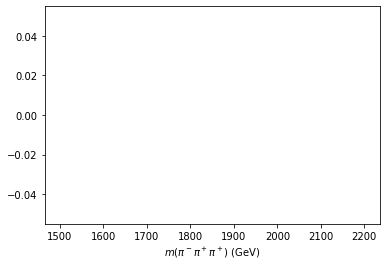

In [21]:
mpipipi = np.sqrt((e1 + e2 + e3)**2 - (p1x + p2x + p3x)**2 - (p1y + p2y + p3y)**2 - (p1z + p2z + p3z)**2)
h1.fill(mpipipi)

h1.plot(histtype = "fill")
plt.show()

[Return to contents](#c)

---